Static front weight: 1153.7 N
Static rear weight: 1200.7 N

Deceleration (g)  |  Weight Transfer (N)  |  % of Total Weight
----------------------------------------
       0.90       |        415.5       |        17.6% 
       1.00       |        461.6       |        19.6% 
       1.10       |        507.8       |        21.6% 
       1.20       |        554.0       |        23.5% 
       1.30       |        600.1       |        25.5% 
       1.40       |        646.3       |        27.5% 
       1.50       |        692.5       |        29.4% 


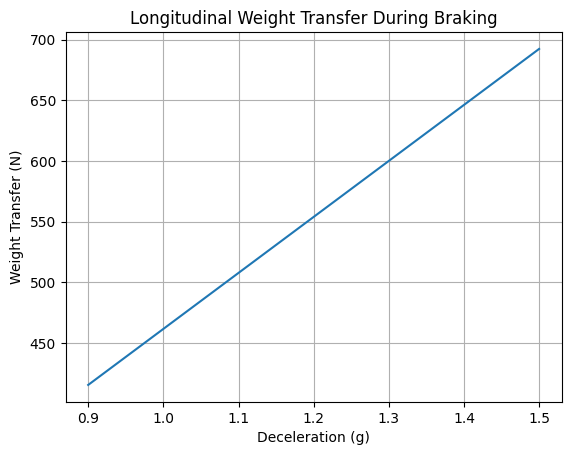

In [ ]:

# Basic calculations script
import numpy as np
import matplotlib.pyplot as plt

# Vehicle parameters (estimate for Formula Student car)
mass = 240  # kg (with driver)
wheelbase = 1.53  # meters
cg_height = 0.3  # meters
weight_dist_front = 0.49  # 49% front weight distribution
total_weight = mass * 9.81  # N

# Calculate static weight on each axle
weight_front = mass * 9.81 * weight_dist_front
weight_rear = mass * 9.81 * (1 - weight_dist_front)

print(f"Static front weight: {weight_front:.1f} N")
print(f"Static rear weight: {weight_rear:.1f} N")

# Calculate longitudinal weight transfer during braking
def calculate_weight_transfer(mass, deceleration_g, cg_height, wheelbase):
    """
    Calculate longitudinal weight transfer during braking
    """
    weight_transfer = (mass * 9.81 * deceleration_g * cg_height) / wheelbase
    return weight_transfer

# Test with 1.5g braking (typical Formula Student max)
decels = np.linspace(0.9, 1.5, 7)
transfers = [calculate_weight_transfer(mass, d, cg_height, wheelbase) for d in decels]
print("\nDeceleration (g)  |  Weight Transfer (N)  |  % of Total Weight")
print("-" * 40)
for d, t in zip(decels, transfers):
    print(f"      {d:5.2f}       |       {t:6.1f}       |       {t / total_weight * 100:5.1f}% ")

# Plotting weight transfer vs deceleration
plt.plot(decels, transfers)
plt.xlabel('Deceleration (g)')
plt.ylabel('Weight Transfer (N)')
plt.title('Longitudinal Weight Transfer During Braking')
plt.grid(True)
plt.show()
